<a href="https://colab.research.google.com/github/lilyjordan/transformer/blob/main/Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are some first principle questions to answer:

## What is different architecturally from the Transformer, vs a normal RNN, like an LSTM? (Specifically, how are recurrence and time managed?)
Normal RNNs generate a sequence of hidden states for each subsequent token in the sample, where the next step is generated as a function of the previous hidden state and the current token. They have attention too, but also there is a hidden state, which forces the model to run everything in order. The Transformer just does away with the hidden state business and instead only uses attention. That means each pair of tokens can just look at each other directly, instead of having to pass information over time through the hidden state. This also doesn't have to build on itself, so it can be parallelized.

## Attention is defined as, Attention(Q,K,V) = softmax(QK^T/sqrt(d_k))V. What are the dimensions for Q, K, and V? Why do we use this setup? What other combinations could we do with (Q,K) that also output weights?
Q stands for Queries, K stands for Keys, V stands for Values. Q and K have dimensions `sequence_length` * $d_k$ and V has dimensions `sequence_length` * $d_v$, where $d_k$ and $d_v$ are hyperparameters. The reason Q and K have the same dimensions is so that we can dot-product them together for each token in the sequence.

We could use addition instead of the dot product if we wanted to. Oh also we scale the dot products down by $\frac{1}{\sqrt{d_k}}$, but we could alternatively not do that.

## Are the dense layers different at each multi-head attention block? Why or why not?
No they're different. The intuition is that different blocks can focus on different layers of abstraction.

## Why do we have so many skip connections, especially connecting the input of an attention function to the output? Intuitively, what if we didn't?
I think this is to avoid vanishing gradients.

In [46]:
import numpy as np
import math


class Transformer:
    def __init__(self, key_dimension=64, value_dimension=64, model_dimension=512,
                 scaling_factor=10000, num_heads=8, num_layers=6,
                 max_sequence_length=512):
        """
        The key_dimension and value_dimension defaults are both chosen
        to be model_dimension divided by value_dimension (64 * 8 = 512),
        but that choice is somewhat arbitrary, so it isn't hard-coded
        into the initialization logic.

        I can't tell from the paper what they use for the max sequence length,
        or even whether they use a single uniform max sequence length; TODO
        figure that out?
        """
        self.key_dimension = key_dimension
        self.value_dimension = value_dimension
        self.model_dimension = model_dimension
        self.scaling_factor = scaling_factor
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.max_sequence_length = max_sequence_length


    def train(self):
        raise NotImplementedError


    def computePositionalEmbeddingMatrix(self):
        return np.fromfunction(
            np.vectorize(self.computePositionalEmbedding),
            (self.max_sequence_length, self.model_dimension)
        )


    def computePositionalEmbedding(self, token_index, embedding_index):
        if embedding_index % 2 == 0:
            return math.sin(self.scalePositionalEmbedding(token_index, embedding_index))
        else:
            return math.cos(self.scalePositionalEmbedding(token_index, embedding_index - 1))


    def scalePositionalEmbedding(self, token_index, embedding_index):
        return token_index / (
            self.scaling_factor ** (embedding_index / self.model_dimension)
        )


    def mask(self):
        raise NotImplementedError


class TransformerLayer:
    def __init__(self):
        pass


class AttentionBlock:
    def __init__(self):
        pass


    def computeAttention(self, queries, keys, values):
        queries * np.transpose(keys) / math.sqrt(keys.shape[1])


    def softmax(self, vec):
        sum_of_exps = np.sum(np.exp(vec))
        return np.exp(vec) / sum_of_exps


class FeedForwardNetwork:
    def __init__(self):
        pass


In [53]:
a = AttentionBlock()
softmax = a.softmax(np.array([0, 1]))
total = np.sum(softmax)
print(softmax, total)

[0.26894142 0.73105858] 1.0


tests

In [37]:
t = Transformer(max_sequence_length=10, model_dimension=60)
PE = t.computePositionalEmbeddingMatrix()

let's graph the positional embeddings

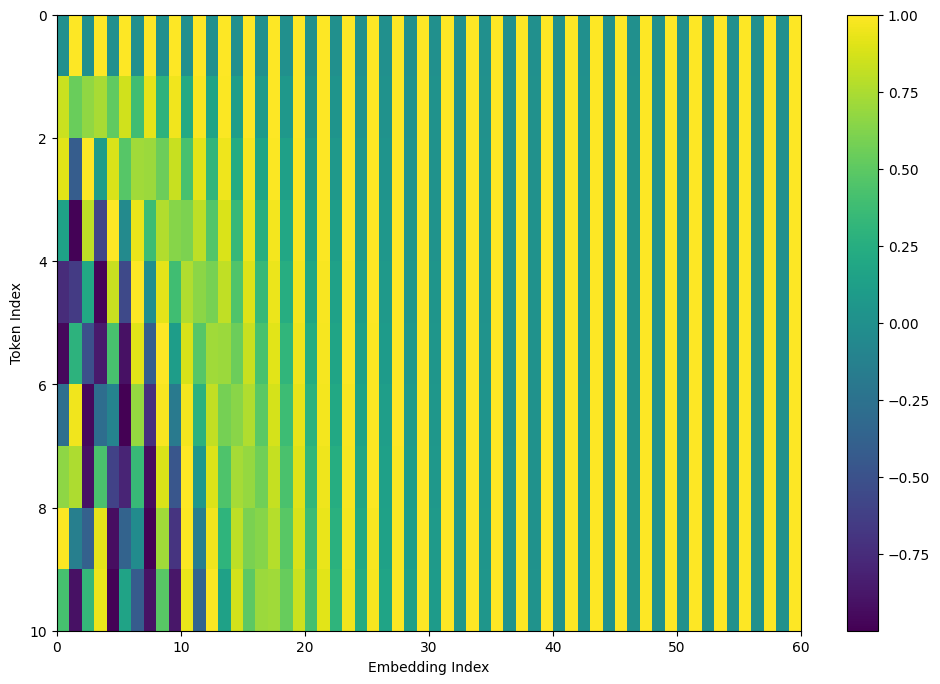

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.pcolormesh(PE, cmap='viridis')

plt.xlabel('Embedding Index')
plt.xlim((0, t.model_dimension))
plt.ylabel('Token Index')
plt.ylim((t.max_sequence_length,0))

plt.colorbar()
plt.show()

great, it matches the reference graph from [here](https://github.com/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb).

In [54]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
